<a href="https://colab.research.google.com/github/pykeen/pykeen/blob/master/notebooks/results_plots/results_plots.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Results Plotting Demo

This notebook serves to make some simple plots of the 1) losses and 2) entities and relations following training with the PyKEEN pipeline.

In [1]:
! python -c "import pykeen" || pip install git+https://github.com/pykeen/pykeen.git

In [2]:
import os

import numpy as np
import pykeen
from matplotlib import pyplot as plt

from pykeen.pipeline import pipeline
from pykeen.triples import TriplesFactory

%matplotlib inline
%config InlineBackend.figure_format = 'svg'

In [3]:
pykeen.env()

Key,Value
OS,posix
Platform,Darwin
Release,20.3.0
User,cthoyt
Time,Thu Apr 15 11:05:54 2021
Python,3.8.8
PyKEEN,1.4.1-dev-4d0c21df
PyTorch,1.8.0
CUDA Available?,false
CUDA Version,N/A


## Toy Example

Following the disussions proposed in https://github.com/pykeen/pykeen/issues/97, a very small set of triples are trained and visualized.

In [4]:
os.makedirs("results", exist_ok=True)

triples = """
Brussels	locatedIn	Belgium
Belgium	partOf	EU
EU	hasCapital	Brussels
""".strip()

triples = np.array([triple.split("\t") for triple in triples.split("\n")])
tf = TriplesFactory.from_labeled_triples(triples=triples)

Training with default arguments

Training epochs on cpu:   0%|          | 0/5 [00:00<?, ?epoch/s]

INFO:pykeen.evaluation.evaluator:Currently automatic memory optimization only supports GPUs, but you're using a CPU. Therefore, the batch_size will be set to the default value.
INFO:pykeen.evaluation.evaluator:No evaluation batch_size provided. Setting batch_size to '32'.
INFO:pykeen.evaluation.evaluator:Evaluation took 0.01s seconds


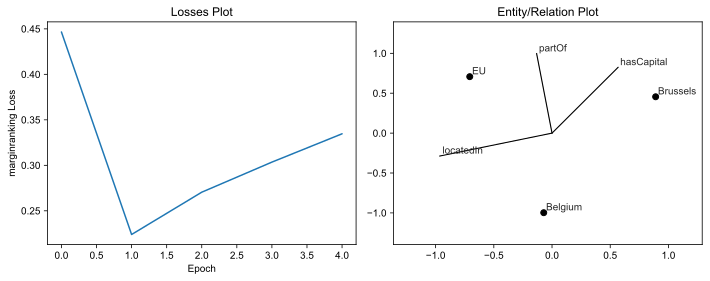

In [5]:
results = pipeline(
    training=tf,
    testing=tf,
    model="TransE",
    model_kwargs=dict(embedding_dim=2),
    training_kwargs=dict(use_tqdm_batch=False),
    evaluation_kwargs=dict(use_tqdm=False),
    random_seed=1,
    device="cpu",
)
results.plot(er_kwargs=dict(plot_relations=True))
plt.savefig("results/toy_1.png", dpi=300)

Training with slower learning and more epochs

Training epochs on cpu:   0%|          | 0/128 [00:00<?, ?epoch/s]

INFO:pykeen.evaluation.evaluator:Currently automatic memory optimization only supports GPUs, but you're using a CPU. Therefore, the batch_size will be set to the default value.
INFO:pykeen.evaluation.evaluator:No evaluation batch_size provided. Setting batch_size to '32'.
INFO:pykeen.evaluation.evaluator:Evaluation took 0.01s seconds


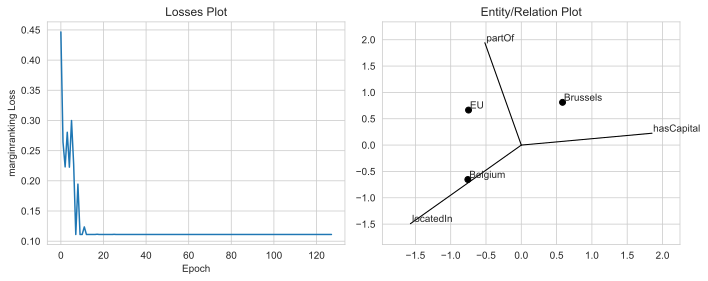

In [6]:
results = pipeline(
    training=tf,
    testing=tf,
    model="TransE",
    model_kwargs=dict(embedding_dim=2),
    optimizer_kwargs=dict(lr=1.0e-1),
    training_kwargs=dict(num_epochs=128, use_tqdm_batch=False),
    evaluation_kwargs=dict(use_tqdm=False),
    random_seed=1,
    device="cpu",
)
results.plot(er_kwargs=dict(plot_relations=True))
plt.savefig("results/toy_2.png", dpi=300)

Training with appropriate softplus

In [7]:
toy_results = pipeline(
    training=tf,
    testing=tf,
    model="TransE",
    loss="softplus",
    model_kwargs=dict(embedding_dim=2),
    optimizer_kwargs=dict(lr=1.0e-1),
    training_kwargs=dict(num_epochs=128, use_tqdm_batch=False),
    evaluation_kwargs=dict(use_tqdm=False),
    random_seed=1,
    device="cpu",
)

Training epochs on cpu:   0%|          | 0/128 [00:00<?, ?epoch/s]

INFO:pykeen.evaluation.evaluator:Currently automatic memory optimization only supports GPUs, but you're using a CPU. Therefore, the batch_size will be set to the default value.
INFO:pykeen.evaluation.evaluator:No evaluation batch_size provided. Setting batch_size to '32'.
INFO:pykeen.evaluation.evaluator:Evaluation took 0.01s seconds


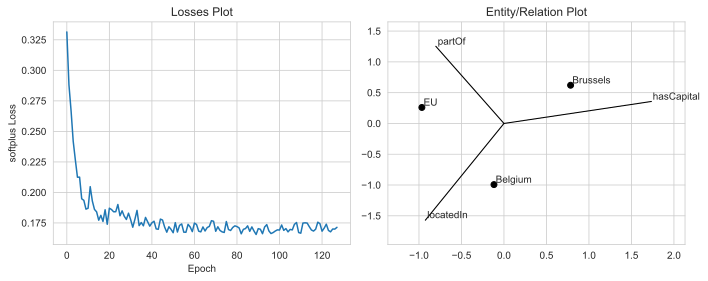

In [8]:
toy_results.plot(er_kwargs=dict(plot_relations=True))
plt.savefig("results/toy_3.png", dpi=300)

## Benchmark Dataset Example

In [9]:
nations_results = pipeline(
    dataset="Nations",
    model="TransE",
    model_kwargs=dict(embedding_dim=8),
    optimizer_kwargs=dict(lr=1.0e-1),
    training_kwargs=dict(num_epochs=80, use_tqdm_batch=False),
    evaluation_kwargs=dict(use_tqdm=False),
    random_seed=1,
    device="cpu",
)

Training epochs on cpu:   0%|          | 0/80 [00:00<?, ?epoch/s]

INFO:pykeen.evaluation.evaluator:Currently automatic memory optimization only supports GPUs, but you're using a CPU. Therefore, the batch_size will be set to the default value.
INFO:pykeen.evaluation.evaluator:No evaluation batch_size provided. Setting batch_size to '32'.
INFO:pykeen.evaluation.evaluator:Evaluation took 0.02s seconds


(<Figure size 720x288 with 2 Axes>,
 array([<AxesSubplot:title={'center':'Losses Plot'}, xlabel='Epoch', ylabel='marginranking Loss'>,
        <AxesSubplot:title={'center':'Entity/Relation Plot using PCA'}>],
       dtype=object))

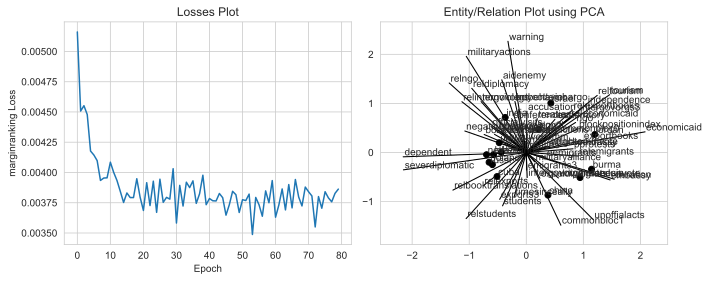

In [10]:
nations_results.plot(er_kwargs=dict(plot_relations=True))

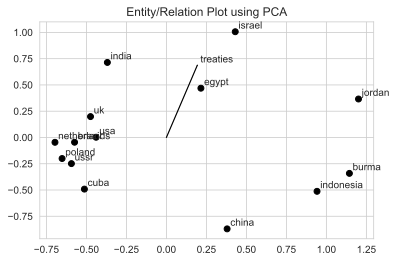

In [11]:
# Filter the ER plot down to a specific set of entities and relations
nations_results.plot_er(
    relations={"treaties"},
    apply_limits=False,
    plot_relations=True,
);